# still not complete

Loading: D:\impress_project\eeg_signals\data\LRMI-21679035\organized_data_v2\raw_labelled_results\sub-01_raw_labelled.npz

DATASET INVESTIGATION - sub-01

1. BASIC INFORMATION:
   Subject: sub-01
   Sampling rate: 500 Hz
   Total trials: 40
   Left hand trials (label=1): 20
   Right hand trials (label=2): 20

2. DATA DIMENSIONS:
   segments_all shape: (40, 33, 4000)
     - 40 trials
     - 33 channels (all 33)
     - 4000 samples per trial
   segments_eeg shape: (40, 30, 4000)
     - 40 trials
     - 30 channels (30 EEG only)
     - 4000 samples per trial

3. TRIAL DURATION:
   4000 samples ÷ 500 Hz = 8.0 seconds

4. CHANNEL INFORMATION:
   Looking for C3 and C4 channels...
   C3 channel: index 13 (in EEG channels)
   C4 channel: index 14 (in EEG channels)

5. EXTRACTING FIRST TWO TRIALS:
   Trial 1 (index 0): LEFT hand motor imagery
   Trial 2 (index 1): RIGHT hand motor imagery
   Trial 1 C3 shape: (4000,)
   Trial 1 C4 shape: (4000,)

6. TRIAL STRUCTURE (from paper):
   0-2 seconds:

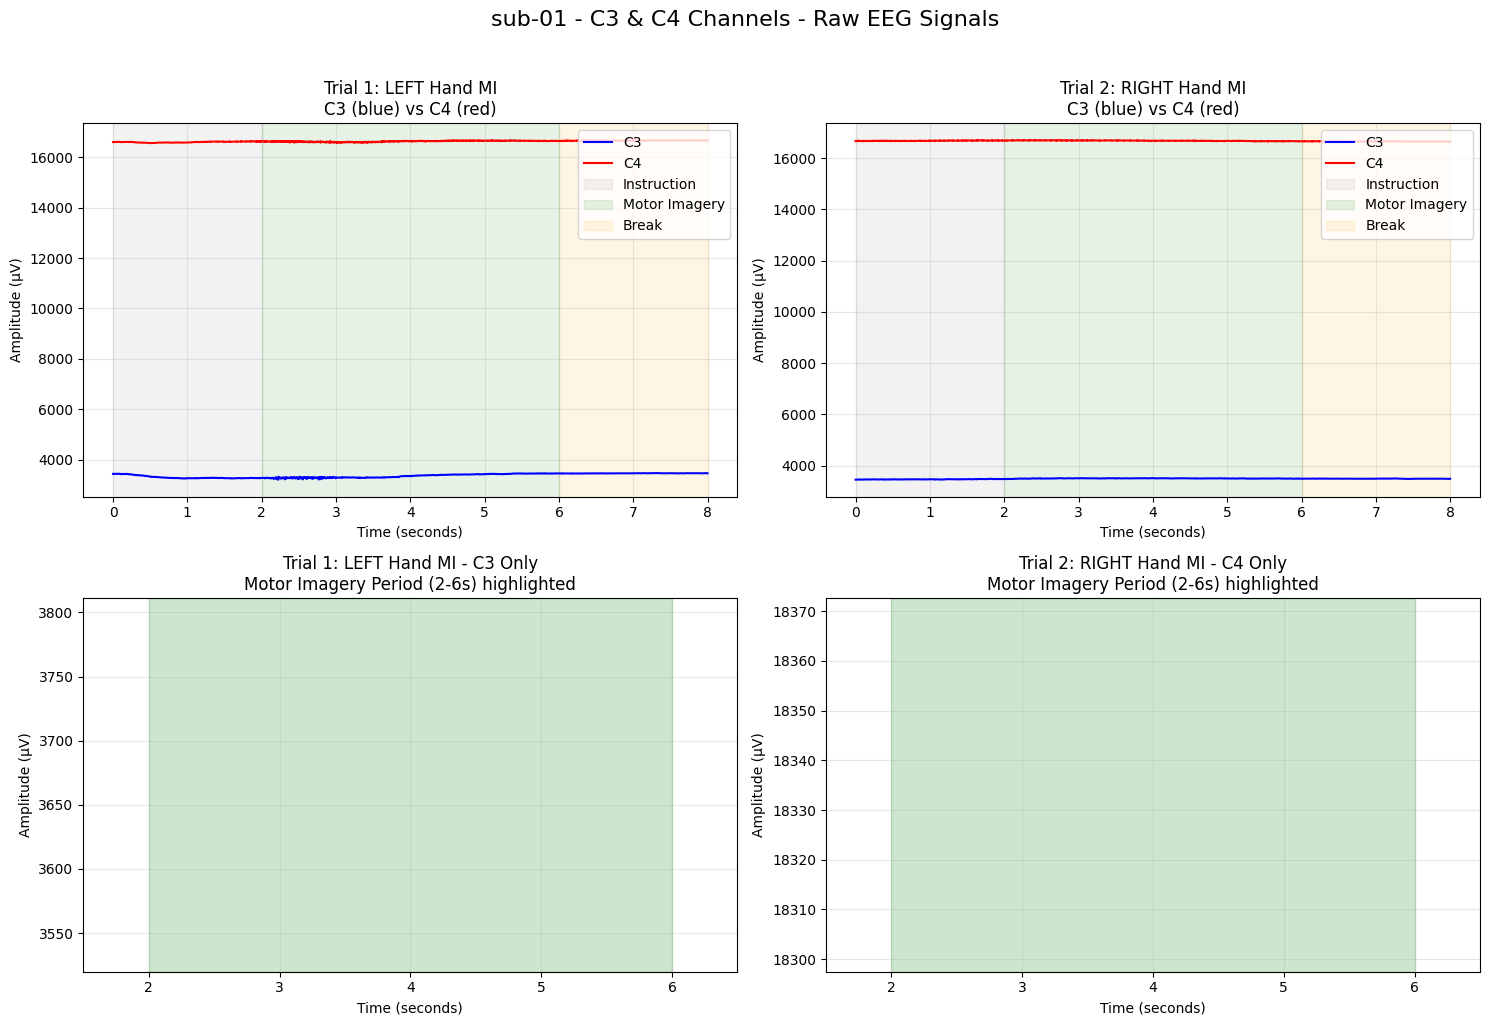


8. CREATING COMPARISON VISUALIZATION...


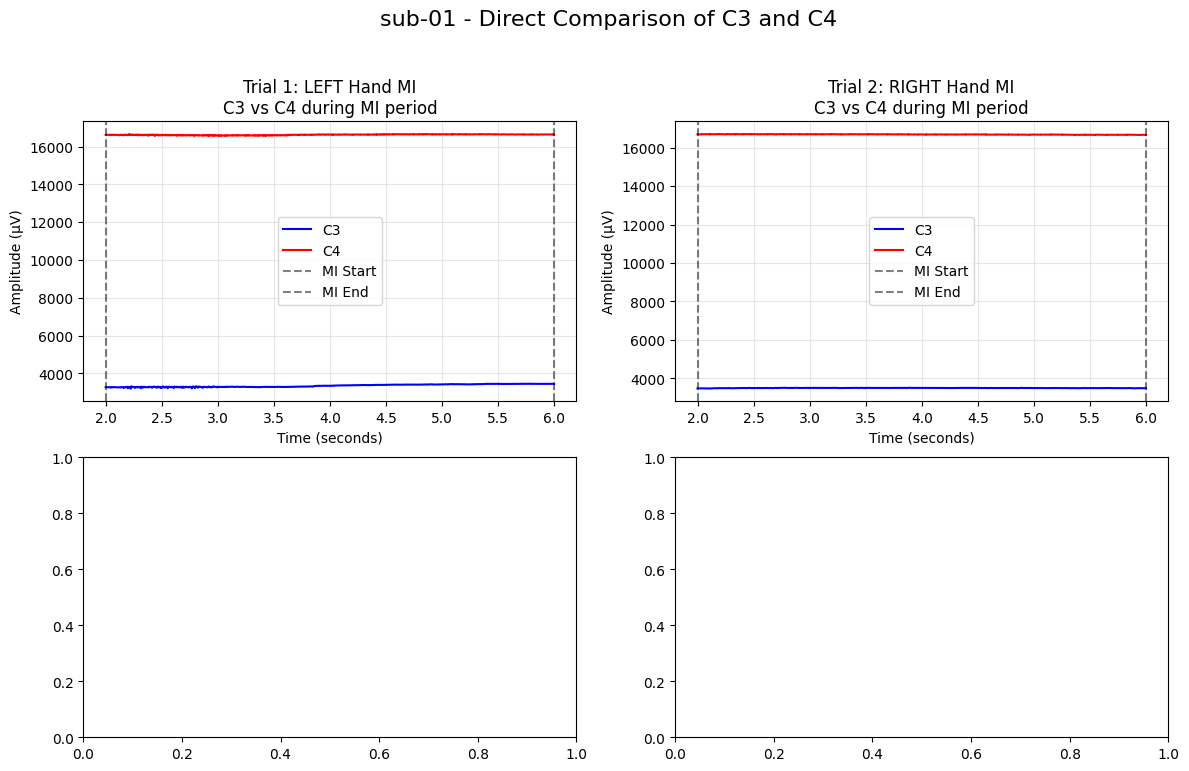

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

# ================= SETUP =================
base_path = r"D:\impress_project\eeg_signals\data\LRMI-21679035\organized_data_v2"
raw_labelled_path = os.path.join(base_path, "raw_labelled_results", "sub-01_raw_labelled.npz")

print(f"Loading: {raw_labelled_path}")

# ================= LOAD DATA =================
data = np.load(raw_labelled_path, allow_pickle=True)

# Extract data
segments_all = data['segments_all']      # All 33 channels (40, 33, 4000)
segments_eeg = data['segments_eeg']      # Only 30 EEG channels (40, 30, 4000)
labels = data['labels']                  # Trial labels (40,)
channels_all = data['channels_all']      # All 33 channel names
channels_eeg = data['channels_eeg']      # Only 30 EEG channel names
sampling_rate = data['sampling_rate']    # 500 Hz
subject_id = data['subject_id']          # 'sub-01'

print("\n" + "="*60)
print(f"DATASET INVESTIGATION - {subject_id}")
print("="*60)

# ================= BASIC INFORMATION =================
print(f"\n1. BASIC INFORMATION:")
print(f"   Subject: {subject_id}")
print(f"   Sampling rate: {sampling_rate} Hz")
print(f"   Total trials: {len(labels)}")
print(f"   Left hand trials (label=1): {np.sum(labels == 1)}")
print(f"   Right hand trials (label=2): {np.sum(labels == 2)}")

print(f"\n2. DATA DIMENSIONS:")
print(f"   segments_all shape: {segments_all.shape}")
print(f"     - {segments_all.shape[0]} trials")
print(f"     - {segments_all.shape[1]} channels (all 33)")
print(f"     - {segments_all.shape[2]} samples per trial")
print(f"   segments_eeg shape: {segments_eeg.shape}")
print(f"     - {segments_eeg.shape[0]} trials")
print(f"     - {segments_eeg.shape[1]} channels (30 EEG only)")
print(f"     - {segments_eeg.shape[2]} samples per trial")

print(f"\n3. TRIAL DURATION:")
trial_duration = segments_all.shape[2] / sampling_rate
print(f"   {segments_all.shape[2]} samples ÷ {sampling_rate} Hz = {trial_duration} seconds")

# ================= FIND C3 AND C4 CHANNELS =================
print(f"\n4. CHANNEL INFORMATION:")
print(f"   Looking for C3 and C4 channels...")

# Find indices of C3 and C4 in EEG channels
c3_idx = None
c4_idx = None

for i, channel in enumerate(channels_eeg):
    if channel == 'C3':
        c3_idx = i
    elif channel == 'C4':
        c4_idx = i

print(f"   C3 channel: index {c3_idx} (in EEG channels)")
print(f"   C4 channel: index {c4_idx} (in EEG channels)")

if c3_idx is None or c4_idx is None:
    # Try looking in all channels
    for i, channel in enumerate(channels_all):
        if channel == 'C3':
            c3_idx = i
        elif channel == 'C4':
            c4_idx = i
    print(f"   Found in all channels: C3={c3_idx}, C4={c4_idx}")

# ================= EXTRACT FIRST TWO TRIALS =================
print(f"\n5. EXTRACTING FIRST TWO TRIALS:")
trial1_idx = 0
trial2_idx = 1

# Get labels for these trials
trial1_label = labels[trial1_idx]
trial2_label = labels[trial2_idx]

trial1_hand = "LEFT" if trial1_label == 1 else "RIGHT"
trial2_hand = "LEFT" if trial2_label == 1 else "RIGHT"

print(f"   Trial 1 (index {trial1_idx}): {trial1_hand} hand motor imagery")
print(f"   Trial 2 (index {trial2_idx}): {trial2_hand} hand motor imagery")

# Extract C3 and C4 data for these trials
# Using segments_all to get all 33 channels
trial1_c3 = segments_all[trial1_idx, c3_idx, :]
trial1_c4 = segments_all[trial1_idx, c4_idx, :]
trial2_c3 = segments_all[trial2_idx, c3_idx, :]
trial2_c4 = segments_all[trial2_idx, c4_idx, :]

print(f"   Trial 1 C3 shape: {trial1_c3.shape}")
print(f"   Trial 1 C4 shape: {trial1_c4.shape}")

# ================= CREATE TIME AXIS =================
# 4000 samples at 500Hz = 8 seconds
time = np.arange(4000) / sampling_rate  # 0 to 8 seconds

# According to paper: each trial has 3 stages:
# 0-2s: Instruction
# 2-6s: Motor Imagery (4 seconds)
# 6-8s: Break

print(f"\n6. TRIAL STRUCTURE (from paper):")
print(f"   0-2 seconds: Instruction")
print(f"   2-6 seconds: Motor Imagery (this is what we're visualizing)")
print(f"   6-8 seconds: Break")

# ================= VISUALIZATION 1: SINGLE TRIALS =================
print(f"\n7. CREATING VISUALIZATIONS...")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle(f'{subject_id} - C3 & C4 Channels - Raw EEG Signals', fontsize=16, y=1.02)

# Plot 1: Trial 1 - C3 and C4 together
ax1 = axes[0, 0]
ax1.plot(time, trial1_c3, 'b-', linewidth=1.5, label='C3')
ax1.plot(time, trial1_c4, 'r-', linewidth=1.5, label='C4')
ax1.axvspan(0, 2, alpha=0.1, color='gray', label='Instruction')
ax1.axvspan(2, 6, alpha=0.1, color='green', label='Motor Imagery')
ax1.axvspan(6, 8, alpha=0.1, color='orange', label='Break')
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Amplitude (μV)')
ax1.set_title(f'Trial 1: {trial1_hand} Hand MI\nC3 (blue) vs C4 (red)')
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# Plot 2: Trial 2 - C3 and C4 together
ax2 = axes[0, 1]
ax2.plot(time, trial2_c3, 'b-', linewidth=1.5, label='C3')
ax2.plot(time, trial2_c4, 'r-', linewidth=1.5, label='C4')
ax2.axvspan(0, 2, alpha=0.1, color='gray', label='Instruction')
ax2.axvspan(2, 6, alpha=0.1, color='green', label='Motor Imagery')
ax2.axvspan(6, 8, alpha=0.1, color='orange', label='Break')
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Amplitude (μV)')
ax2.set_title(f'Trial 2: {trial2_hand} Hand MI\nC3 (blue) vs C4 (red)')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

# Plot 3: Trial 1 - C3 only (zoomed on MI period)
ax3 = axes[1, 0]
ax3.plot(time, trial1_c3, 'b-', linewidth=1.5)
ax3.axvspan(2, 6, alpha=0.2, color='green')
ax3.set_xlabel('Time (seconds)')
ax3.set_ylabel('Amplitude (μV)')
ax3.set_title(f'Trial 1: {trial1_hand} Hand MI - C3 Only\nMotor Imagery Period (2-6s) highlighted')
ax3.grid(True, alpha=0.3)
# Zoom on MI period
ax3.set_xlim(1.5, 6.5)
ax3.set_ylim(trial1_c3.min() * 1.1, trial1_c3.max() * 1.1)

# Plot 4: Trial 2 - C4 only (zoomed on MI period)
ax4 = axes[1, 1]
ax4.plot(time, trial2_c4, 'r-', linewidth=1.5)
ax4.axvspan(2, 6, alpha=0.2, color='green')
ax4.set_xlabel('Time (seconds)')
ax4.set_ylabel('Amplitude (μV)')
ax4.set_title(f'Trial 2: {trial2_hand} Hand MI - C4 Only\nMotor Imagery Period (2-6s) highlighted')
ax4.grid(True, alpha=0.3)
# Zoom on MI period
ax4.set_xlim(1.5, 6.5)
ax4.set_ylim(trial2_c4.min() * 1.1, trial2_c4.max() * 1.1)

plt.tight_layout()
plt.show()

# ================= VISUALIZATION 2: SIDE-BY-SIDE COMPARISON =================
print(f"\n8. CREATING COMPARISON VISUALIZATION...")

fig2, axes2 = plt.subplots(2, 2, figsize=(14, 8))
fig2.suptitle(f'{subject_id} - Direct Comparison of C3 and C4', fontsize=16, y=1.02)

# Trial 1: C3 vs C4 comparison
ax1 = axes2[0, 0]
ax1.plot(time[1000:3000], trial1_c3[1000:3000], 'b-', linewidth=1.5, label='C3')
ax1.plot(time[1000:3000], trial1_c4[1000:3000], 'r-', linewidth=1.5, label='C4')
ax1.axvline(x=2, color='k', linestyle='--', alpha=0.5, label='MI Start')
ax1.axvline(x=6, color='k', linestyle='--', alpha=0.5, label='MI End')
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Amplitude (μV)')
ax1.set_title(f'Trial 1: {trial1_hand} Hand MI\nC3 vs C4 during MI period')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Trial 2: C3 vs C4 comparison
ax2 = axes2[0, 1]
ax2.plot(time[1000:3000], trial2_c3[1000:3000], 'b-', linewidth=1.5, label='C3')
ax2.plot(time[1000:3000], trial2_c4[1000:3000], 'r-', linewidth=1.5, label='C4')
ax2.axvline(x=2, color='k', linestyle='--', alpha=0.5, label='MI Start')
ax2.axvline(x=6, color='k', linestyle='--', alpha=0.5, label='MI End')
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Amplitude (μV)')
ax2.set_title(f'Trial 2: {trial2_hand} Hand MI\nC3 vs C4 during MI period')
ax2.legend()
ax2.grid(True, alpha=0.3)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

# ================= SETUP =================
base_path = r"D:\impress_project\eeg_signals\data\LRMI-21679035\organized_data_v2"
raw_labelled_path = os.path.join(base_path, "raw_labelled_results", "sub-01_raw_labelled.npz")

print(f"Loading: {raw_labelled_path}")

# ================= LOAD DATA =================
data = np.load(raw_labelled_path, allow_pickle=True)

# Extract data
segments_all = data['segments_all']      # All 33 channels (40, 33, 4000)
segments_eeg = data['segments_eeg']      # Only 30 EEG channels (40, 30, 4000)
labels = data['labels']                  # Trial labels (40,)
channels_all = data['channels_all']      # All 33 channel names
channels_eeg = data['channels_eeg']      # Only 30 EEG channel names
sampling_rate = data['sampling_rate']    # 500 Hz
subject_id = data['subject_id']          # 'sub-01'

print("\n" + "="*60)
print(f"DATASET INVESTIGATION - {subject_id}")
print("="*60)

# ================= FIND C3 AND C4 CHANNELS =================
c3_idx = channels_all.index('C3')
c4_idx = channels_all.index('C4')

print(f"\nChannel indices: C3={c3_idx}, C4={c4_idx}")

# ================= CORRECT SEGMENTATION =================
# From paper: Each trial is 8 seconds total:
# 0-2s: Instruction (2s)
# 2-6s: Motor Imagery (4s) ← THIS IS WHAT WE WANT
# 6-8s: Break (2s)

# Calculate sample indices for the 4-second MI period
total_samples_per_trial = 4000  # 8s at 500Hz
mi_start_sample = int(2.0 * sampling_rate)   # 2s → sample 1000
mi_end_sample = int(6.0 * sampling_rate)     # 6s → sample 3000
mi_samples = mi_end_sample - mi_start_sample  # 2000 samples (4s)

print(f"\nCORRECT SEGMENTATION:")
print(f"  Total trial: 0-8 seconds (4000 samples)")
print(f"  MI period: 2-6 seconds (samples {mi_start_sample}-{mi_end_sample})")
print(f"  MI duration: 4 seconds ({mi_samples} samples)")

# Extract ONLY the 4-second MI period
segments_all_mi = segments_all[:, :, mi_start_sample:mi_end_sample]  # (40, 33, 2000)
segments_eeg_mi = segments_eeg[:, :, mi_start_sample:mi_end_sample]  # (40, 30, 2000)

print(f"\nCORRECTED DATA SHAPES:")
print(f"  segments_all_mi: {segments_all_mi.shape} (40 trials × 33 channels × 2000 MI samples)")
print(f"  segments_eeg_mi: {segments_eeg_mi.shape} (40 trials × 30 EEG channels × 2000 MI samples)")

# ================= EXTRACT FIRST TWO TRIALS (MI PERIOD ONLY) =================
trial1_idx = 0
trial2_idx = 1

trial1_label = labels[trial1_idx]
trial2_label = labels[trial2_idx]

trial1_hand = "LEFT" if trial1_label == 1 else "RIGHT"
trial2_hand = "LEFT" if trial2_label == 1 else "RIGHT"

print(f"\nFIRST TWO TRIALS (MI PERIOD ONLY):")
print(f"  Trial 1: {trial1_hand} hand motor imagery")
print(f"  Trial 2: {trial2_hand} hand motor imagery")

# Extract C3 and C4 data for MI period only
trial1_c3_mi = segments_all_mi[trial1_idx, c3_idx, :]
trial1_c4_mi = segments_all_mi[trial1_idx, c4_idx, :]
trial2_c3_mi = segments_all_mi[trial2_idx, c3_idx, :]
trial2_c4_mi = segments_all_mi[trial2_idx, c4_idx, :]

print(f"\nMI PERIOD DATA SHAPES:")
print(f"  Trial 1 C3: {trial1_c3_mi.shape} ({len(trial1_c3_mi)/sampling_rate} seconds)")
print(f"  Trial 1 C4: {trial1_c4_mi.shape} ({len(trial1_c4_mi)/sampling_rate} seconds)")

# ================= CREATE TIME AXIS FOR MI PERIOD =================
time_mi = np.arange(mi_samples) / sampling_rate  # 0 to 4 seconds

# ================= VISUALIZATION 1: MI PERIOD ONLY =================
print(f"\nCREATING VISUALIZATIONS (4-second MI period only)...")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle(f'{subject_id} - C3 & C4 Channels - 4-Second Motor Imagery Period', fontsize=16, y=1.02)

# Plot 1: Trial 1 - C3 and C4 during MI
ax1 = axes[0, 0]
ax1.plot(time_mi, trial1_c3_mi, 'b-', linewidth=1.5, label='C3', alpha=0.8)
ax1.plot(time_mi, trial1_c4_mi, 'r-', linewidth=1.5, label='C4', alpha=0.8)
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Amplitude (μV)')
ax1.set_title(f'Trial 1: {trial1_hand} Hand MI\nC3 (blue) vs C4 (red) - MI Period')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Trial 2 - C3 and C4 during MI
ax2 = axes[0, 1]
ax2.plot(time_mi, trial2_c3_mi, 'b-', linewidth=1.5, label='C3', alpha=0.8)
ax2.plot(time_mi, trial2_c4_mi, 'r-', linewidth=1.5, label='C4', alpha=0.8)
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Amplitude (μV)')
ax2.set_title(f'Trial 2: {trial2_hand} Hand MI\nC3 (blue) vs C4 (red) - MI Period')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Trial 1 - C3 only
ax3 = axes[1, 0]
ax3.plot(time_mi, trial1_c3_mi, 'b-', linewidth=1.5)
ax3.fill_between(time_mi, trial1_c3_mi.min(), trial1_c3_mi.max(), 
                 alpha=0.1, color='blue')
ax3.set_xlabel('Time (seconds)')
ax3.set_ylabel('Amplitude (μV)')
ax3.set_title(f'Trial 1: {trial1_hand} Hand MI - C3 Only\nMean: {trial1_c3_mi.mean():.2f} μV, SD: {trial1_c3_mi.std():.2f} μV')
ax3.grid(True, alpha=0.3)

# Plot 4: Trial 2 - C4 only
ax4 = axes[1, 1]
ax4.plot(time_mi, trial2_c4_mi, 'r-', linewidth=1.5)
ax4.fill_between(time_mi, trial2_c4_mi.min(), trial2_c4_mi.max(), 
                 alpha=0.1, color='red')
ax4.set_xlabel('Time (seconds)')
ax4.set_ylabel('Amplitude (μV)')
ax4.set_title(f'Trial 2: {trial2_hand} Hand MI - C4 Only\nMean: {trial2_c4_mi.mean():.2f} μV, SD: {trial2_c4_mi.std():.2f} μV')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



Loading: D:\impress_project\eeg_signals\data\LRMI-21679035\organized_data_v2\raw_labelled_results\sub-01_raw_labelled.npz

DATASET INVESTIGATION - sub-01


AttributeError: 'numpy.ndarray' object has no attribute 'index'